In [1]:
import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o dataframes
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Superstore.csv")  # Leer el archivo


In [2]:
df.head() # Para ver como se compone la base de datos.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Country', 'Postal Code'], axis = 'columns', inplace=True) 
# Eliminamos columnas que no vamos a utilizar en el analisis

In [4]:
df.sample(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4447,11/16/2014,11/21/2014,Standard Class,Steven Roelle,Home Office,Bloomington,Indiana,Central,OFF-ST-10000675,Office Supplies,Storage,"File Shuttle II and Handi-File, Black",169.45,5,0.0,42.3625
5590,12/8/2016,12/11/2016,Second Class,Doug Bickford,Consumer,San Francisco,California,West,OFF-ST-10003816,Office Supplies,Storage,Fellowes High-Stak Drawer Files,352.38,2,0.0,81.0474


### A) DATA WRANGLING

In [5]:
# Hacemos este chequeo para ver si hay algun valor NAN en el dataframe, si sale TRUE quiere decir que si hay al menos un valor
# NAN y deberemos verificar como resolverlo tambien.
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [6]:
df.isnull().sum() # Otra forma de corroborar que no faltan datos, nos muestra la suma de valores que faltan.

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### B) VISUALIZANDO LAS VARIABLES
#### Para asi entender como estan distribuidos los datos, elegimos algunos campos representativos y vemos la representación grafica del mismo.

In [7]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

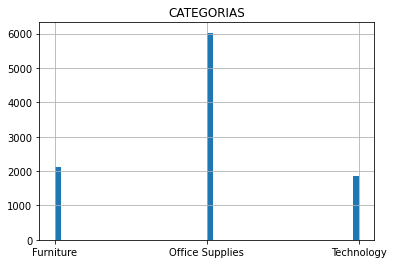

<Figure size 432x288 with 0 Axes>

In [8]:
df['Category'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('CATEGORIAS')
plt.grid(True)
plt.show()
plt.clf()

In [9]:
df.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

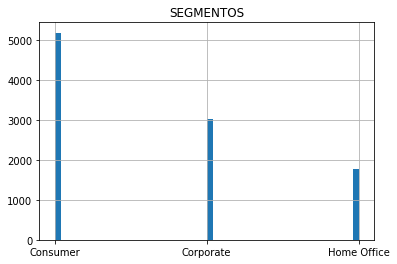

<Figure size 432x288 with 0 Axes>

In [10]:
df['Segment'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('SEGMENTOS')
plt.grid(True)
plt.show()
plt.clf()

In [11]:
df.Discount.value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

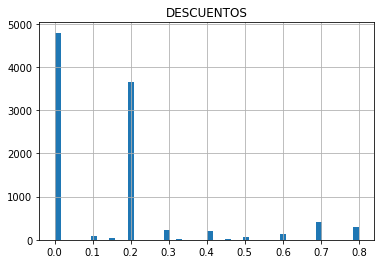

<Figure size 432x288 with 0 Axes>

In [12]:
df['Discount'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('DESCUENTOS')
plt.grid(True)
plt.show()
plt.clf()

### C) CONTINUANDO CON EL ANALISIS

In [13]:
df.dtypes 

Order Date        object
Ship Date         object
Ship Mode         object
Customer Name     object
Segment           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [14]:
df.corr()         # Calcula la correlacion entre todas las variables del dataframe

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


(0.0, 27.039621805512713)

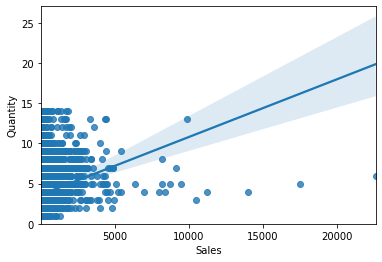

In [15]:
sns.regplot(x="Sales", y="Quantity", data=df)   # Para hacer un grafico y ver la correlación que hay de forma grafica
plt.ylim(0)

(0.0, 0.8515948557210946)

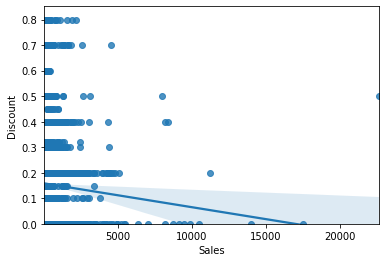

In [16]:
sns.regplot(x="Sales", y="Discount", data=df)   # Para hacer un grafico y ver la correlación que hay de forma grafica
plt.ylim(0)

(0.0, 9149.9737)

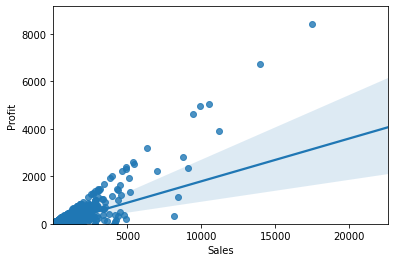

In [17]:
sns.regplot(x="Sales", y="Profit", data=df)   # Para hacer un grafico y ver la correlación que hay de forma grafica
plt.ylim(0)

### Entre Sales y Profit hay una pequeña correlación, para confirmar y practicar aplico un mapa de calor para verlo desde otra perspectiva y ver cuales estan interrelacionadas.

In [18]:
Cormat = df.corr()
Cormat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

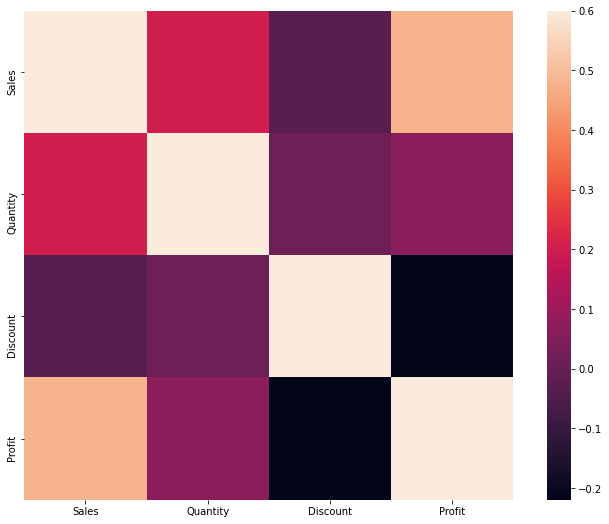

In [19]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(Cormat, vmax=.6, square=True)
# vmax: Hasta donde llega el gradiente, el difuminado de color, si fuera 1 seria hasta ser totalmente blanco.

# Interpretación: Mientras mas claro sean los colores, mayor correlación habra entre variables.

In [20]:
sns.set() # Le decimos a Seaborn que grafique con la configuracion de defecto.

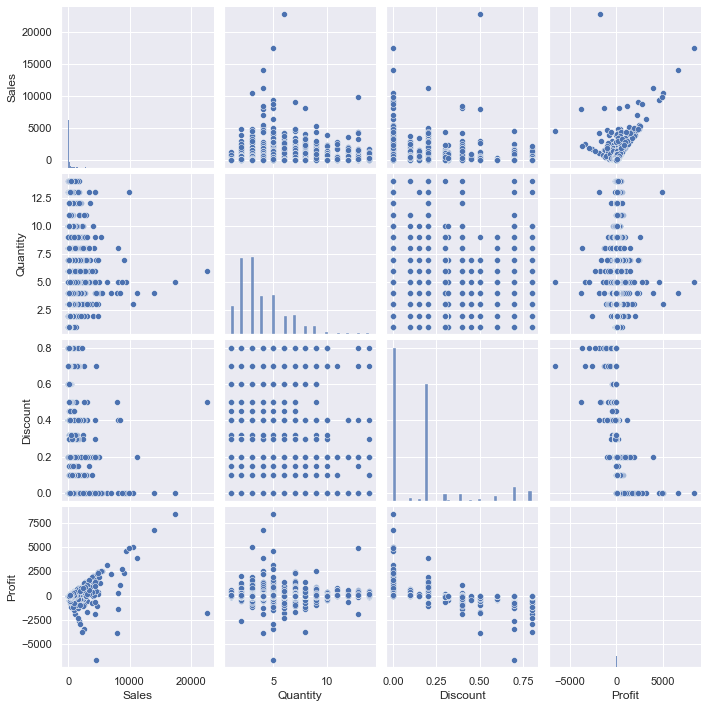

In [21]:
cols = ["Sales", "Quantity", "Discount", "Profit"]

sns.pairplot(df[cols], height=2.5)
plt.show()

Text(0.5, 0, 'Profit')

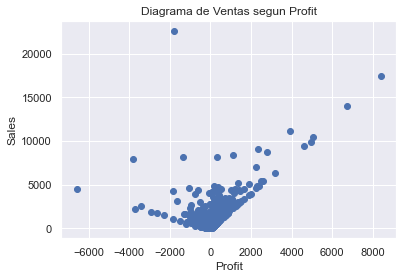

In [22]:
y=df ["Sales"]
x=df ["Profit"]
plt.scatter(x,y)

plt.title("Diagrama de Ventas segun Profit")  # Hacemos un diagrama de dispersión segun las variables definidas.
plt.ylabel("Sales")
plt.xlabel("Profit")

# Correlación de Pearson

### PEARSON = 1: Correlación lineal perfectamente positiva.
### PEARSON = 0: No hay relación lineal, las 2 variables no se afectan una a otra.
### PEARSON =-1: Perfectamente negativa seria la correlación lineal.

# P-VALUE

### P-Value  <  0.001: Fuerte evidencia de que la correlación es significante.
### P-Value  <  0.05: Moderada evidencia de que la correlación es significante.
### P-Value  <  0.1: Debil evidencia de que la correlación es significante.
### P-Value  >  0.1: No hay evidencia de que la correlación es significante.

In [24]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Sales'], df['Profit'])
print("La correlacion de Pearson tiene un coeficiente de", pearson_coef, " con un P-Value de P =", p_value) 

La correlacion de Pearson tiene un coeficiente de 0.4790643497377067  con un P-Value de P = 0.0
